In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data


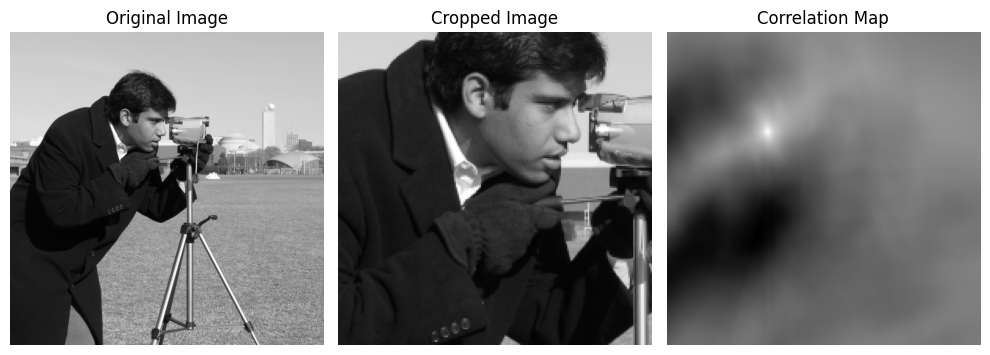

Maximum Correlation: 0.9997132420539856


In [2]:

# بارگیری عکس
image =  data.camera()

# انتخاب بخش مورد نظر از عکس برای crop
x, y, w, h = 100, 100, 200, 200  # مختصات و ابعاد بخش مورد نظر برای crop
cropped_image = image[y:y+h, x:x+w]

# نرمالایز کردن عکس اصلی و بخش crop شده
normalized_image = cv2.normalize(image.astype(np.float32), None, 0.0, 1.0, cv2.NORM_MINMAX)
normalized_cropped_image = cv2.normalize(cropped_image.astype(np.float32), None, 0.0, 1.0, cv2.NORM_MINMAX)

# محاسبه کورلیشن
correlation = cv2.matchTemplate(normalized_image, normalized_cropped_image, cv2.TM_CCORR_NORMED)
max_correlation = np.max(correlation)

# نمایش تصاویر و کورلیشن
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(correlation, cmap='gray')
plt.title('Correlation Map')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Maximum Correlation: {max_correlation}")


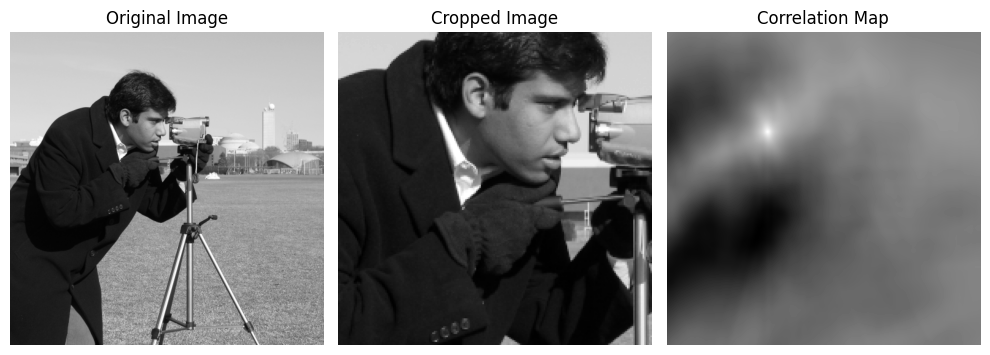

Maximum Correlation: 0.9999997019767761


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

# load img
image =  data.camera()

# normalize
normalized_image = cv2.normalize(image.astype(np.float32), None, 0.0, 1.0, cv2.NORM_MINMAX)

# crop img
x, y, w, h = 100, 100, 200, 200  
cropped_image = normalized_image[y:y+h, x:x+w]

# Corrleation computation
correlation = cv2.matchTemplate(normalized_image, cropped_image, cv2.TM_CCORR_NORMED)
# correlation = signal.correlate2d (normalized_image, cropped_image)

max_correlation = np.max(correlation)

# نمایش تصاویر و کورلیشن
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cropped_image, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(correlation, cmap='gray')
plt.title('Correlation Map')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Maximum Correlation: {max_correlation}")
